In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
D = lambda n,p: (1-p)/(n*p**((1.0+n)/n))
U = lambda n,p,d,y: y - (p*d) + ((p**(1-(1/n)))/(1-n)) - p**(-1/n)

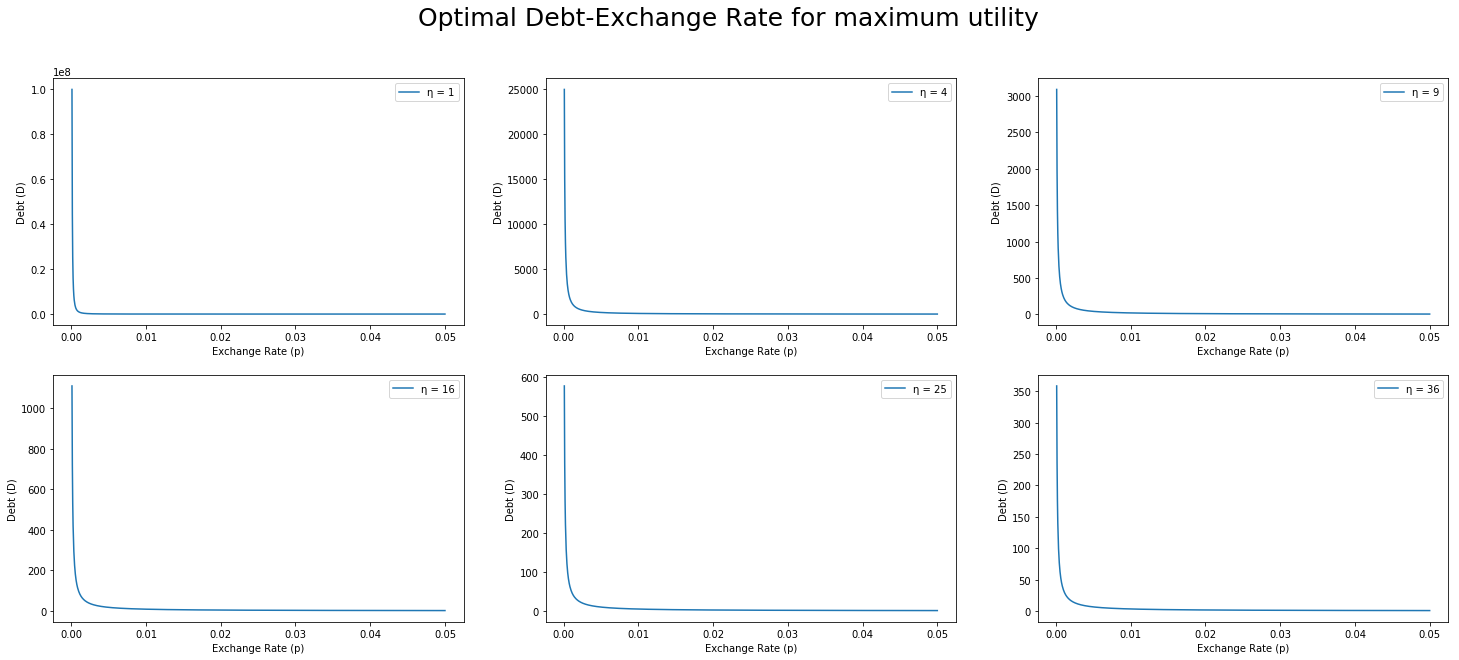

<Figure size 432x288 with 0 Axes>

In [3]:
fig, ax = plt.subplots(2, 3, figsize=(25,10))
for i in range(6):
    r  = i/3
    c  = i%3
    
    p = np.linspace(0.0001,0.05,1000)
    ax[r,c].plot(p, D((i+1)**2,p), label = u"η = {}".format((i+1)**2))
    
    ax[r,c].set_xlabel("Exchange Rate (p)")
    ax[r,c].set_ylabel("Debt (D)")
    ax[r,c].legend()
    
plt.suptitle("Optimal Debt-Exchange Rate for maximum utility", fontsize= 25)
plt.show()
plt.tight_layout()

#  UTILITY CONTOUR PLOT

In [21]:
p = np.linspace(-0.01,1, 1000)
d = np.linspace(2, 16000, 1000)
y = [100, 10000, 1000000]
n = [1.5,5,10,20,500]
n = [0.8,1.05, 2 ,5,50]

X, Y = np.meshgrid(p, d)

/Users/shahnawazakhtar/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


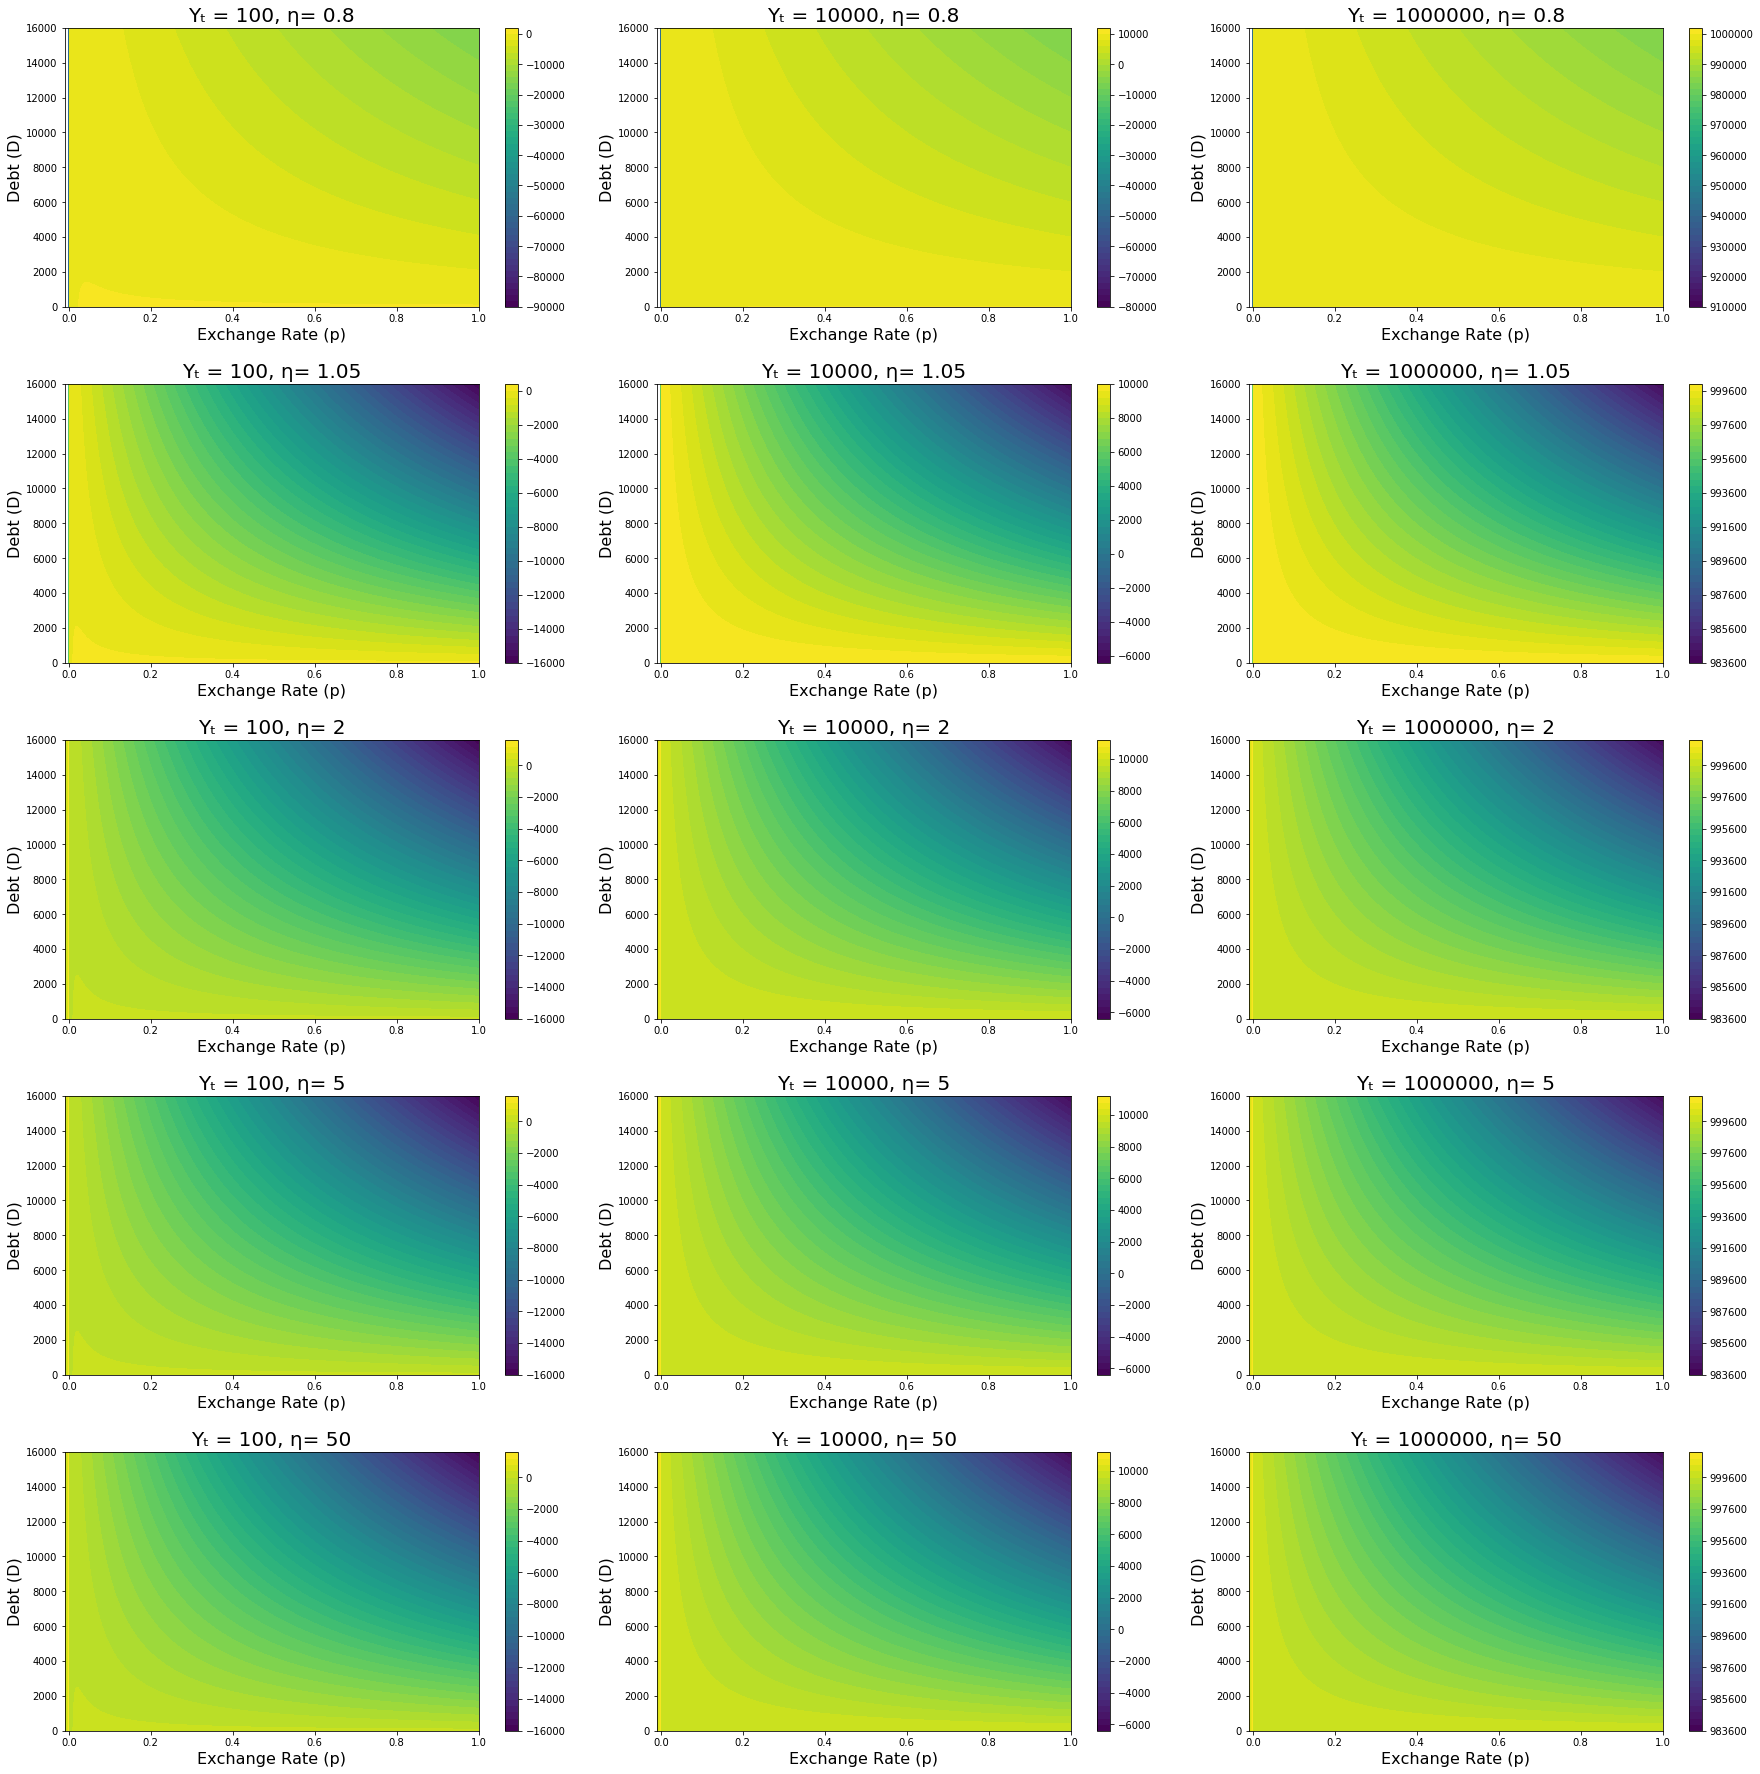

In [23]:
fig, ax = plt.subplots(5, 3, figsize=(25,25))

for i in range(15):
    r  = i/3
    c  = i%3
    Z = U(n[r],X,Y,y[c])
    
    cp = ax[r,c].contourf(X, Y, Z,50)
    plt.colorbar(cp, ax=ax[r,c])
    
    ax[r,c].set_xlabel("Exchange Rate (p)", fontsize = 16)
    ax[r,c].set_ylabel("Debt (D)", fontsize = 16)
    ax[r,c].set_title(u"Yₜ = {}, η= {}".format(y[c],n[r]), fontsize = 20)
    
fig.tight_layout(pad = 2)
plt.show()

# DEBT to GDP ratio

In [60]:
debt_stats = pd.read_csv("Debt Stats 2.csv")

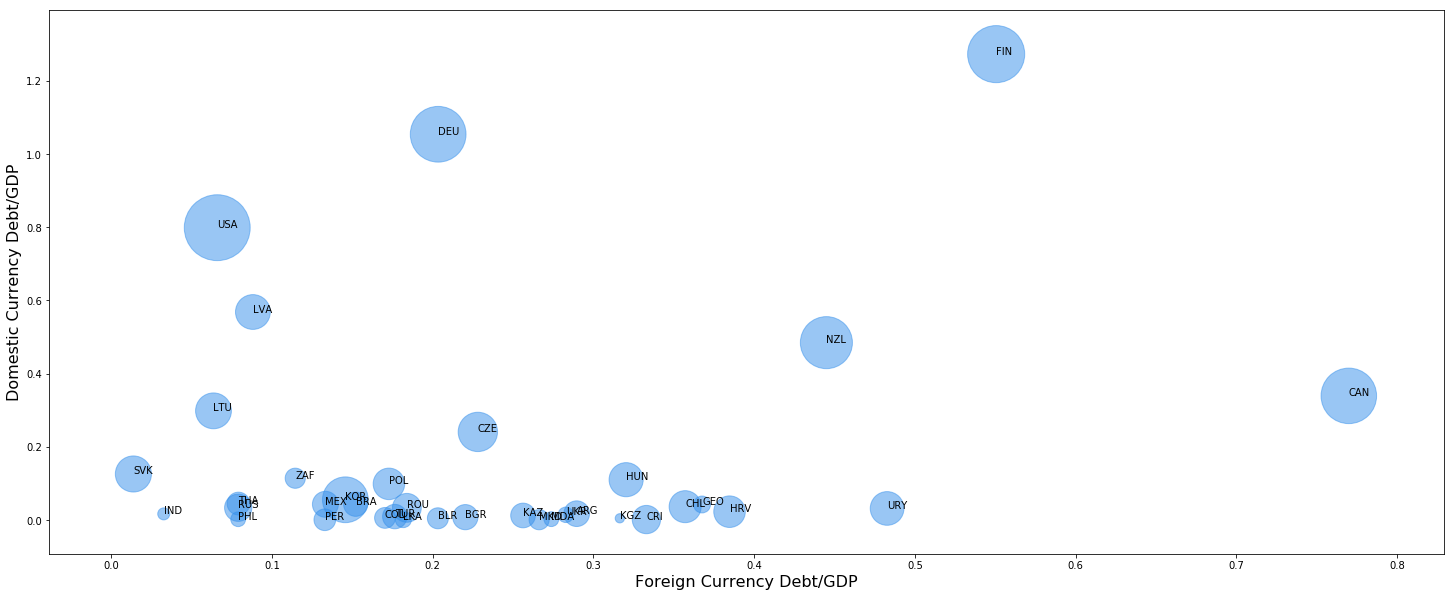

In [61]:
fig, ax = plt.subplots(figsize = (25,10))
npcgdp = debt_stats["NGDPPC (IMF 2019)"].apply(lambda  x: x.replace("$","").replace(",","")).astype("float")/15

ax.scatter(debt_stats["Ratio F/GDPPPP"], debt_stats["Ratio D/GDPPPP"], c="#348feb",alpha=0.5, s=npcgdp)

ax.set_xlabel("Foreign Currency Debt/GDP", fontsize=16)
ax.set_ylabel("Domestic Currency Debt/GDP", fontsize=16)

for i, txt in enumerate(debt_stats["Code"]):
    ax.annotate(txt, (debt_stats["Ratio F/GDPPPP"][i], debt_stats["Ratio D/GDPPPP"][i]))